In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [28]:
#Referência: http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
class Perceptron(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta #taxa de aprendizado
        self.epochs = epochs #número de iterações para determinar o vetor de pesos (w)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #Produto vetorial + bias
    
    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1]) # Cria vetor de pesos com n linhas (conforme coluna de X) + 1 (para bias)
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                
                #Função de custo e atualização dos pesos
                #thetaX = taxa_atualizacao * (targe - predicted) * inputX
                                
                update = self.eta * (target - self.predict(xi)) #decide para onde o vetor de pesos irá girar
                # Repare que se for predito corretamente, o resultado do update será zero, 
                # logo o peso não será alterado
                self.w_[1:] +=  update * xi #aqui decide o quanto irá girar                    
                self.w_[0] +=  update #peso theta0 não possui variavel atrelada, logo + update, apenas
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # Aplica a função de ativação (step_function)

In [29]:
def plot_decision_regions(X, y, clf, res=0.02):
    """
    Plots decision regions of a classifier.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
      Feature Matrix.
      
    y : array-like, shape = [n_samples]
      True class labels.
    
    clf : Classifier object. Must have a .predict method.
        
    res : float (default: 0.02)
      Grid width. Lower values increase the resolution but
        slow down the plotting.
        
    Returns
    ---------
    None

    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                         np.arange(y_min, y_max, res))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.8)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Weights: [-0.4  -0.68  1.82]


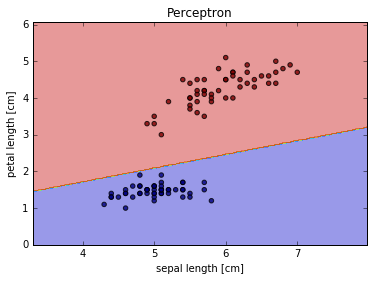

In [32]:
df = pd.read_csv('iris.data', header=None)

# obtem a classe das 100 primeiras linhas
y = df.iloc[0:100, 4].values
# transforma o vetor, que antes possuia cada valor de classe, em outro vetor com -1 e 1, onde -1 é Iris-setosa e
# 1 qualquer outra classe
y = np.where(y == 'Iris-setosa', -1, 1)

# obtem as features sepal length and petal length das 100 primeiras linhas
X = df.iloc[0:100, [0,2]].values


ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

# plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
# plt.xlabel('Iterations')
# plt.ylabel('Missclassifications')
# plt.show()

